In [32]:
import os
import csv
from functools import partial
import glob

from scipy.io import loadmat
import ruptures as rpt

import numpy as np 

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from matplotlib.ticker import FuncFormatter


import seaborn as sns

In [8]:
noisy_mats  = glob.glob('../../../datasets/Data_27012021_noisy/real/*.mat')
noisy_mats.sort()

print (noisy_mats)

['../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM10Hz_paliers_0to120PercTnom_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM20Hz_TorqueSteps_20190419_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM30Hz_paliers_0to120PercTnom_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM45Hz_TorqueSteps_20190419_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM50Hz_paliers_0to120PercTnom_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM60Hz_TorqueSteps_20190419_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM68Hz_paliers_0to120PercTnom_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_NoLM_SpeedVariations2_20190419_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_NoLM_SpeedVariations_20190419_Data.mat', '../../../datasets/Data_27012021_noisy/real/OFVC4kW_NoLM_paliers_0to100Hz_Data.mat']


In [20]:
def get_osc(path): 
    speed_dyns = []
    torque_dyns = []
    
    speed_r = csv.reader(open(path.replace('.mat', '_speed.csv'), 'r'), delimiter='\t')
    for row in speed_r:
        if 'Dyn' not in row[2]:
            speed_dyns.append([int(row[0]), int(row[1]), row[2]])
        
    torque_r = csv.reader(open(path.replace('.mat', '_torque.csv'), 'r'), delimiter='\t')
    for row in torque_r:
        if 'Dyn' not in row[2]:
            torque_dyns.append([int(row[0]), int(row[1]), row[2]])
    
    return speed_dyns, torque_dyns

In [68]:
for mat_file in noisy_mats:
    speed_dyns, torque_dyns = get_osc(mat_file)
    
    if len(speed_dyns) > 0:
        print (mat_file, speed_dyns)

../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM30Hz_paliers_0to120PercTnom_Data.mat [[2522, 4230, "'Oscillations'"]]
../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM45Hz_TorqueSteps_20190419_Data.mat [[8327, 10351, "'Oscillations'"]]


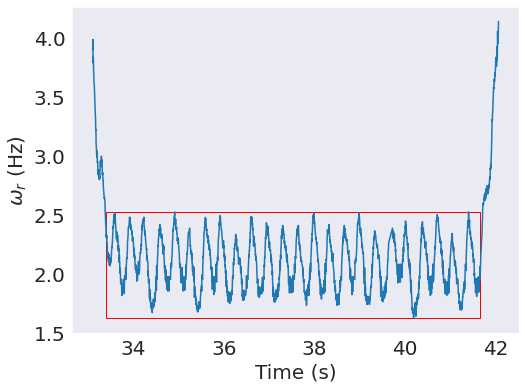

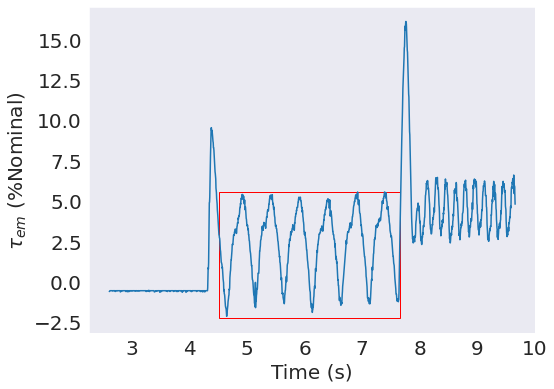

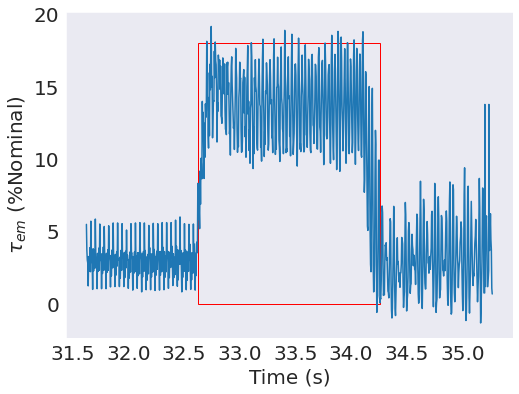

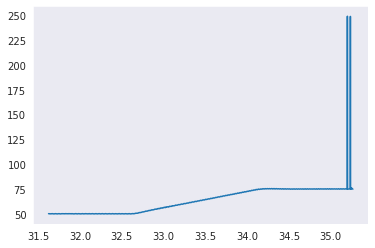

In [124]:
mf1 = '../../../datasets/Data_27012021_noisy/real/OFVC4kW_LM45Hz_TorqueSteps_20190419_Data.mat' #speed first

noisy_mat = loadmat(mf1)
speed_dyns, _ = get_osc(mf1)
ex = 100

st, et, typ = speed_dyns[0]
mean = np.mean(noisy_mat['noisy_speed'][0][st:et])
noisy_mat['noisy_speed'][0][st:et][noisy_mat['noisy_speed'][0][st:et] < mean - 5] = mean
noisy_mat['noisy_speed'][0][st:et][noisy_mat['noisy_speed'][0][st:et] > mean + 5] = mean

sns.set_style("dark")
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(noisy_mat['time'][0][st-ex:et+ex], noisy_mat['noisy_speed'][0][st-ex:et+ex])

time = noisy_mat['time'][0][st:et]
speed = noisy_mat['noisy_speed'][0][st:et]
rec = Rectangle((time.min()-0.1, speed.min()), time.max()-time.min()+0.1, speed.max()-speed.min(), fc='none', ec='red', lw=1)

ax.add_patch(rec)
plt.ylabel(r'$\omega_r$ (Hz)', fontsize=20)
plt.xlabel('Time (s)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

mf2 = '../../../datasets/Data_27012021_noisy/real/OFVC4kW_NoLM_paliers_0to100Hz_Data.mat' #torque last
noisy_mat = loadmat(mf2)
_, torque_dyns = get_osc(mf2)

ex = 500

st, et, typ = torque_dyns[0]

mean = np.mean(noisy_mat['noisy_torque'][0][st:et])
noisy_mat['noisy_torque'][0][st:et][noisy_mat['noisy_torque'][0][st:et] < mean - 5] = mean
noisy_mat['noisy_torque'][0][st:et][noisy_mat['noisy_torque'][0][st:et] > mean + 5] = mean

sns.set_style("dark")
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(noisy_mat['time'][0][st-ex:et+ex], noisy_mat['noisy_torque'][0][st-ex:et+ex])

time = noisy_mat['time'][0][st:et]
torque = noisy_mat['noisy_torque'][0][st:et]
rec = Rectangle((time.min()-0.1, torque.min()-0.1), time.max()-time.min()+0.1, torque.max()-torque.min()+0.1, fc='none', ec='red', lw=1)

ax.add_patch(rec)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel(r'$\tau_{em}$ (%Nominal)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('oscillations.pdf', bbox_inches="tight", dpi=300)
            

mf2 = '../../../datasets/Data_27012021_noisy/real/OFVC4kW_NoLM_paliers_0to100Hz_Data.mat' #torque last
noisy_mat = loadmat(mf2)
_, torque_dyns = get_osc(mf2)

ex = 350

st, et, typ = torque_dyns[2]

mean = np.mean(noisy_mat['noisy_torque'][0][st:et])
noisy_mat['noisy_torque'][0][st-ex:et+ex][noisy_mat['noisy_torque'][0][st-ex:et+ex] < mean - 50] = mean
noisy_mat['noisy_torque'][0][st-ex:et+ex][noisy_mat['noisy_torque'][0][st-ex:et+ex] > mean + 50] = mean

sns.set_style("dark")
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(noisy_mat['time'][0][st-ex:et+ex], noisy_mat['noisy_torque'][0][st-ex:et+ex])

time = noisy_mat['time'][0][st:et]
torque = noisy_mat['noisy_torque'][0][st:et]
rec = Rectangle((time.min()-0.4, 0), time.max()-time.min()+0.8, 18, fc='none', ec='red', lw=1)

ax.add_patch(rec)
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel(r'$\tau_{em}$ (%Nominal)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('instab.pdf', bbox_inches="tight", dpi=300)
plt.show()
plt.plot(noisy_mat['time'][0][st-ex:et+ex], noisy_mat['noisy_speed'][0][st-ex:et+ex])